In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("../../mapped_df.csv", index_col=0)

pos_label = "Approved"
neg_label = "Denied"

In [67]:
def plot_success(df, col, xlabel, col_order=None):
    _, ax = plt.subplots(figsize=(7, 4))

    sns.countplot(df, x=col, hue="success", order=col_order, ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(df[col], df["success"], normalize="index")

    if col_order is None:
        ax2.scatter(ct.index.values, ct.loc[:, pos_label], c="k")
    else:
        ax2.plot(col_order, ct.loc[col_order, pos_label], c="k", marker="o")

    ax.tick_params(axis="x", labelrotation=15)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Success rate")
    ax2.set_ylim(np.min([ct.loc[:, pos_label].min() - 0.1, 0.5]), 1.1)

    plt.tight_layout()
    plt.show()


def plot_success_numerical(df, col, xlabel, bins=5, q=False):
    _, ax = plt.subplots(figsize=(7, 4))

    tdf = df.copy()
    if q:
        tdf[col] = pd.qcut(df[col], q=bins)
    else:
        tdf[col] = pd.cut(df[col], bins=bins)
    sns.countplot(tdf, x=col, hue="success", ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(tdf[col], tdf["success"], normalize="index")

    ax2.scatter(ct.index.astype(str), ct.loc[:, pos_label].values, c="k")

    ax.tick_params(axis="x", labelrotation=25)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Success rate")
    ax2.set_ylim(np.min([ct.loc[:, pos_label].values.min() - 0.1, 0.5]), 1.1)

    plt.tight_layout()
    plt.show()

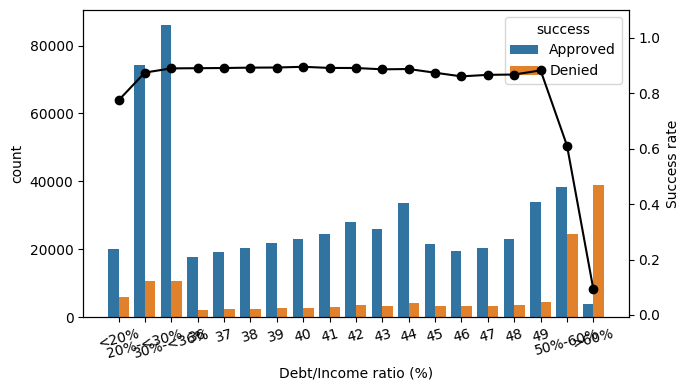

In [68]:
plot_success(
    df,
    "debt_to_income_ratio",
    "Debt/Income ratio (%)",
    col_order=[
        "<20%",
        "20%-<30%",
        "30%-<36%",
        "36",
        "37",
        "38",
        "39",
        "40",
        "41",
        "42",
        "43",
        "44",
        "45",
        "46",
        "47",
        "48",
        "49",
        "50%-60%",
        ">60%",
    ],
)

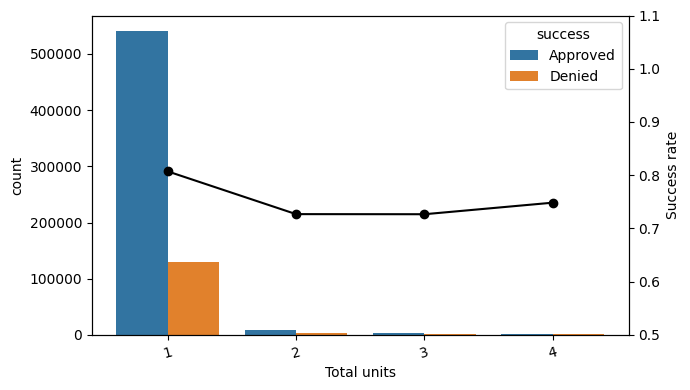

In [69]:
tdf = df[["total_units", "success"]].copy()
tdf["total_units"] = [str(x) for x in tdf["total_units"].values]
plot_success(
    tdf, "total_units", "Total units", col_order=[str(x) for x in [1, 2, 3, 4]]
)

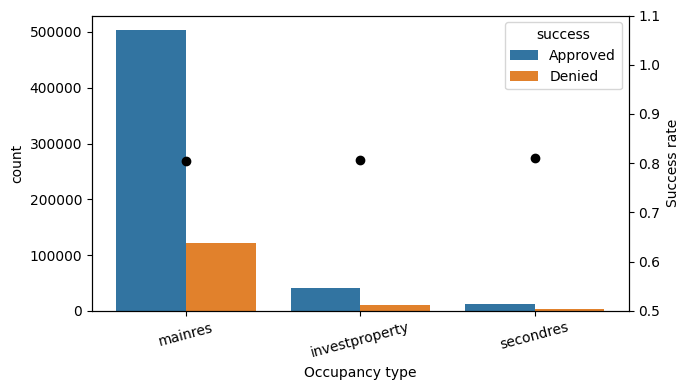

In [70]:
plot_success(df, "occupancy_type", "Occupancy type")

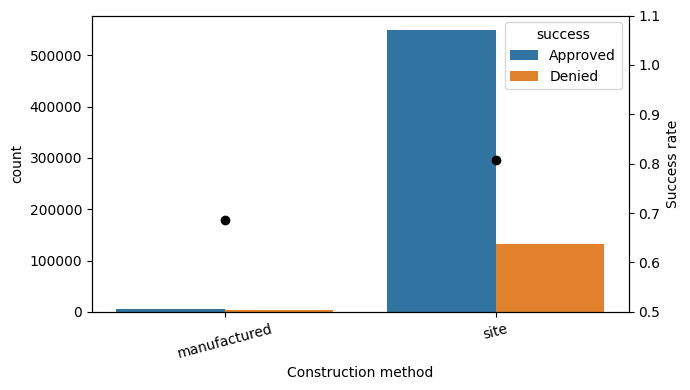

In [71]:
plot_success(df, "construction_method", "Construction method")

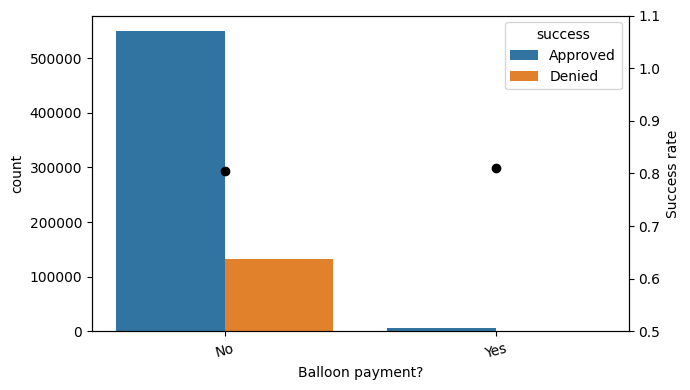

In [72]:
plot_success(df, "balloon_payment", "Balloon payment?")

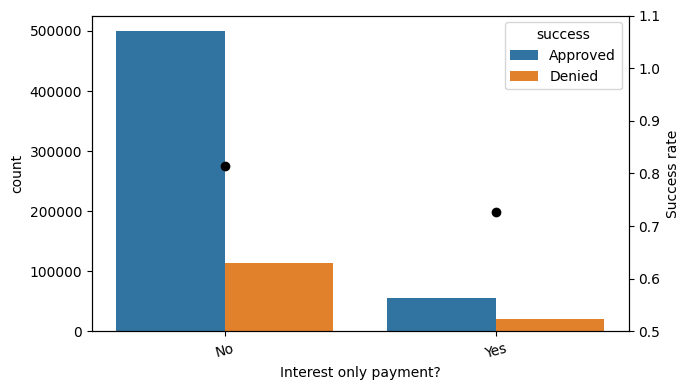

In [73]:
plot_success(df, "interest_only_payment", "Interest only payment?")

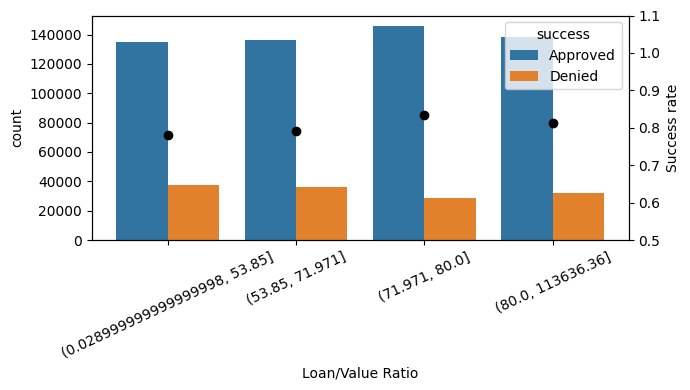

In [74]:
plot_success_numerical(df, "loan_to_value_ratio", "Loan/Value Ratio", bins=4, q=True)

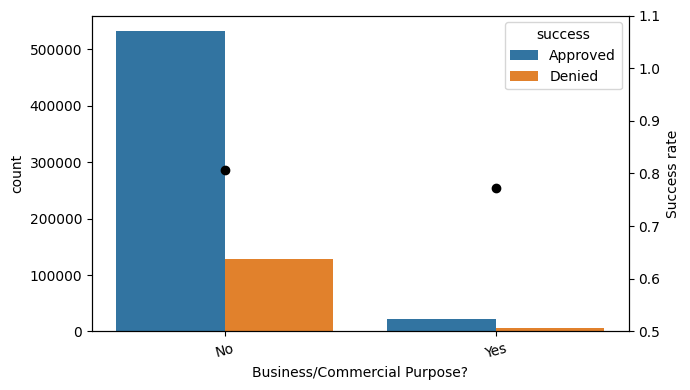

In [75]:
plot_success(df, "business_or_commercial_purpose", "Business/Commercial Purpose?")

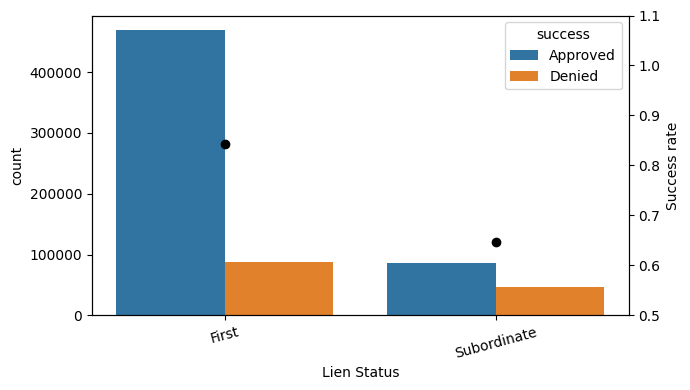

In [76]:
plot_success(df, "lien_status", "Lien Status")

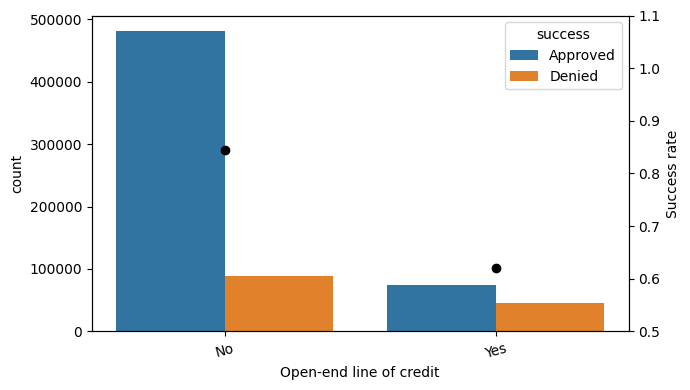

In [77]:
plot_success(df, "open-end_line_of_credit", "Open-end line of credit")

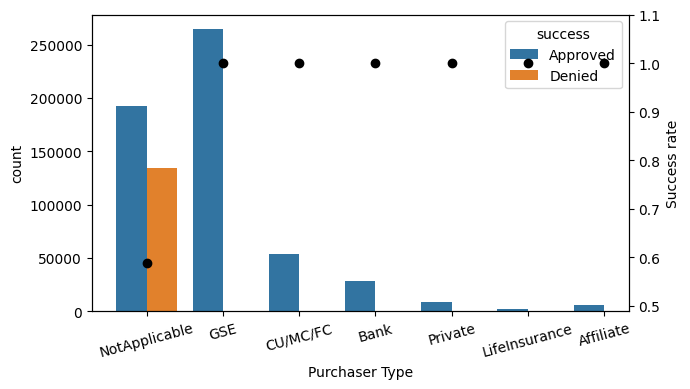

In [78]:
plot_success(df, "purchaser_type", "Purchaser Type")

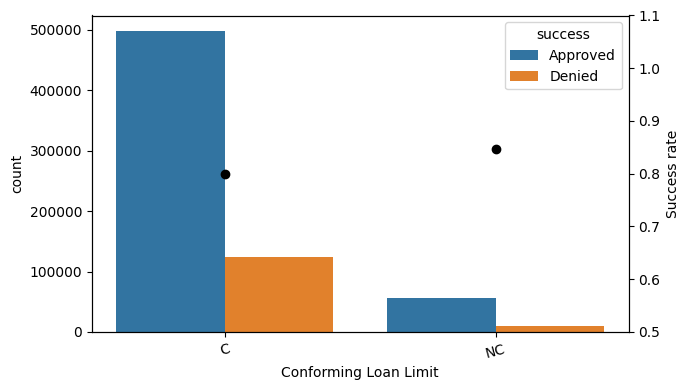

In [79]:
plot_success(df, "conforming_loan_limit", "Conforming Loan Limit")

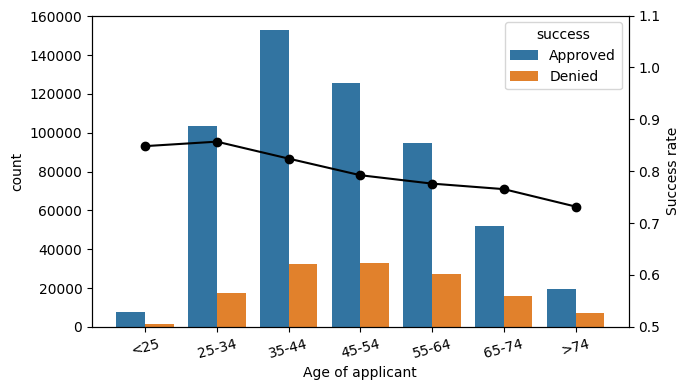

In [80]:
plot_success(
    df,
    "applicant_age",
    "Age of applicant",
    col_order=["<25", "25-34", "35-44", "45-54", "55-64", "65-74", ">74"],
)

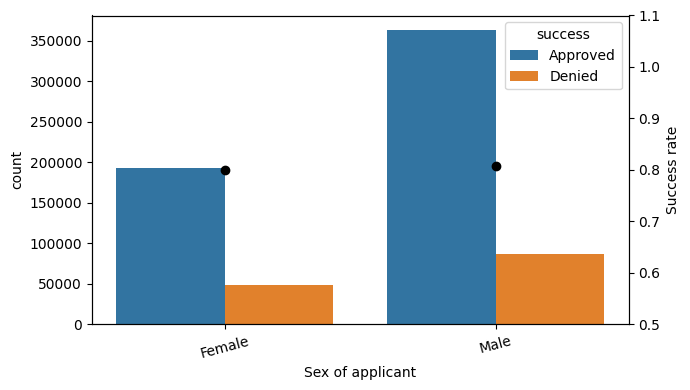

In [81]:
plot_success(df, "applicant_sex", "Sex of applicant")

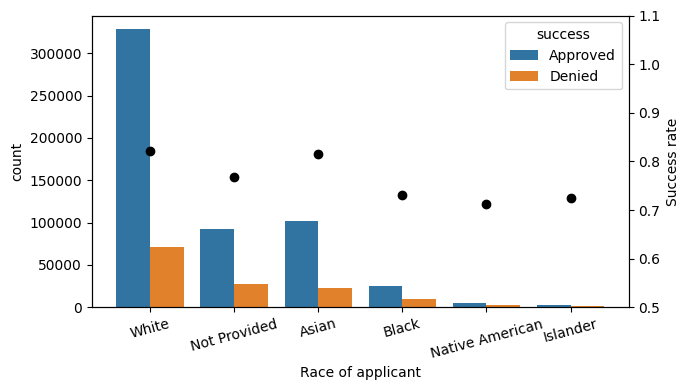

In [82]:
plot_success(
    df,
    "applicant_race",
    "Race of applicant",
)

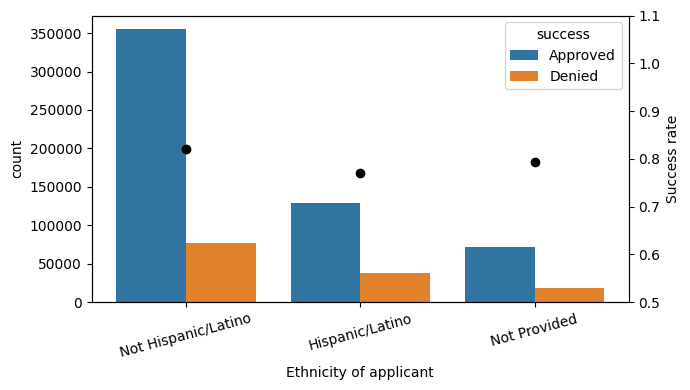

In [83]:
plot_success(df, "applicant_ethnicity", "Ethnicity of applicant")

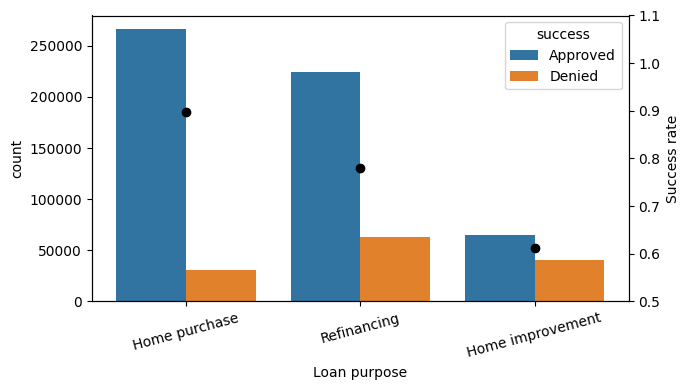

In [84]:
plot_success(df, "loan_purpose", "Loan purpose")

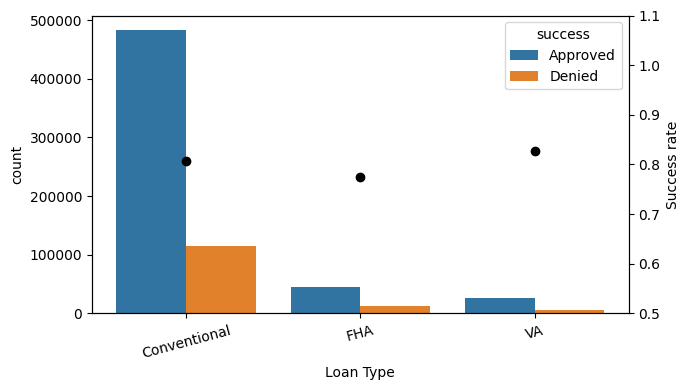

In [85]:
plot_success(df, "loan_type", "Loan Type")

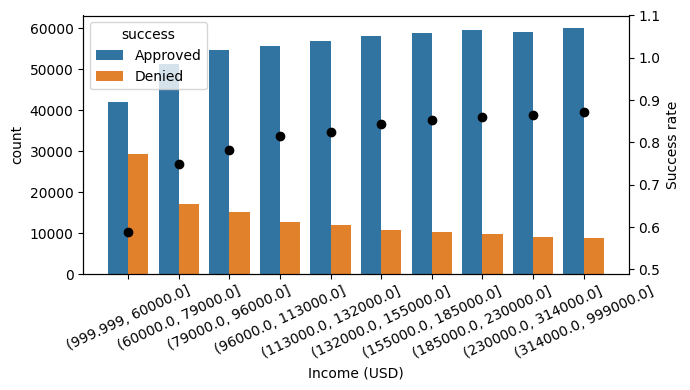

In [86]:
plot_success_numerical(df, "income", "Income (USD)", bins=10, q=True)

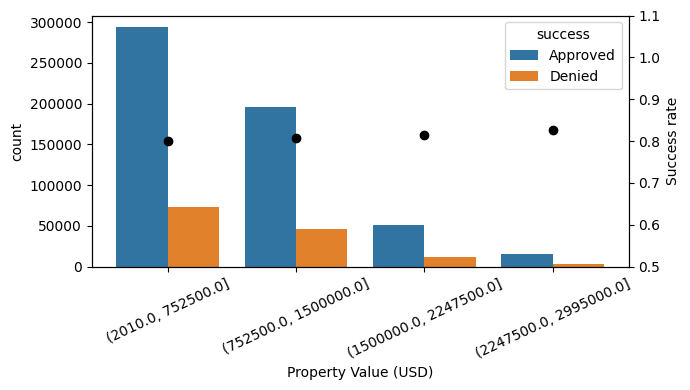

In [87]:
plot_success_numerical(df, "property_value", "Property Value (USD)", bins=4, q=False)

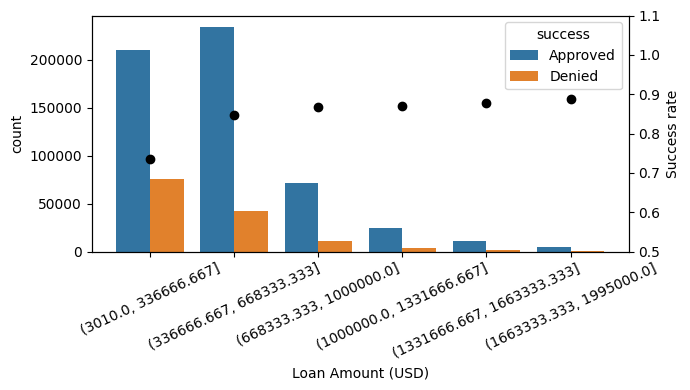

In [88]:
plot_success_numerical(df, "loan_amount", "Loan Amount (USD)", bins=6, q=False)

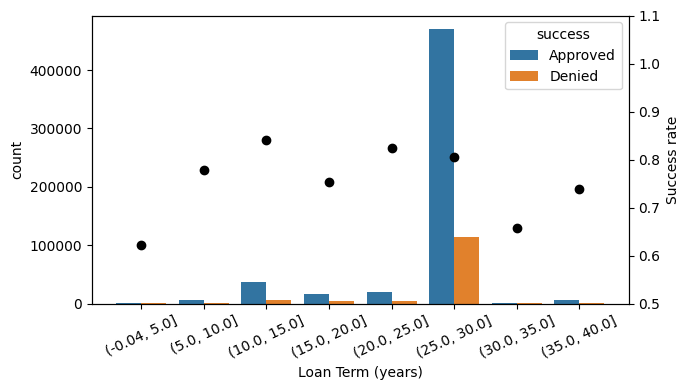

In [89]:
tdf = df[["loan_term", "success"]].copy()
tdf["loan_term"] = np.array([int(x) for x in tdf.loc[:, "loan_term"].values])
tdf["loan_term"].value_counts()
plot_success_numerical(tdf, "loan_term", "Loan Term (years)", bins=8, q=False)

In [90]:
df.columns.tolist()

['county_code',
 'conforming_loan_limit',
 'success',
 'purchaser_type',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'loan_to_value_ratio',
 'loan_term',
 'interest_only_payment',
 'balloon_payment',
 'property_value',
 'construction_method',
 'occupancy_type',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_age',
 'tract_population',
 'tract_minority_population_percent',
 'ffiec_msa_md_median_family_income',
 'tract_to_msa_income_percentage',
 'tract_owner_occupied_units',
 'tract_one_to_four_family_homes',
 'tract_median_age_of_housing_units']

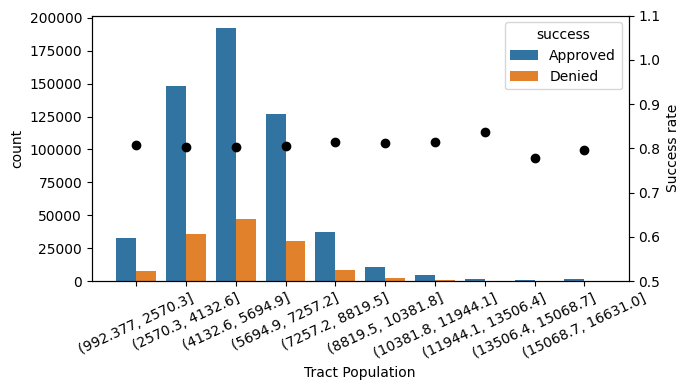

In [91]:
plot_success_numerical(df, "tract_population", "Tract Population", bins=10)

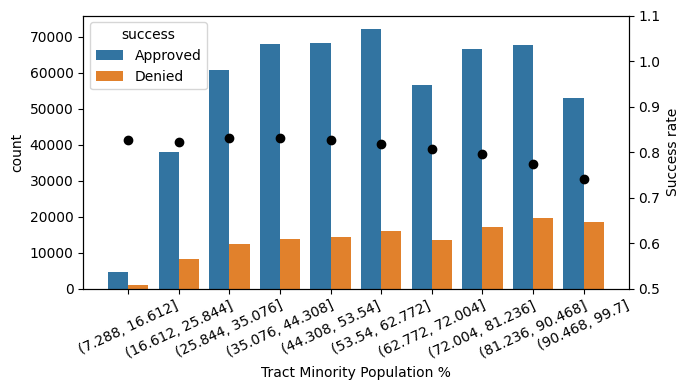

In [92]:
plot_success_numerical(
    df, "tract_minority_population_percent", "Tract Minority Population %", bins=10
)

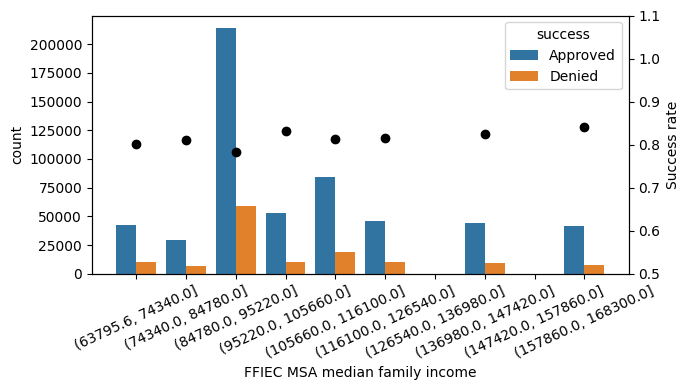

In [94]:
plot_success_numerical(
    df, "ffiec_msa_md_median_family_income", "FFIEC MSA median family income", bins=10
)

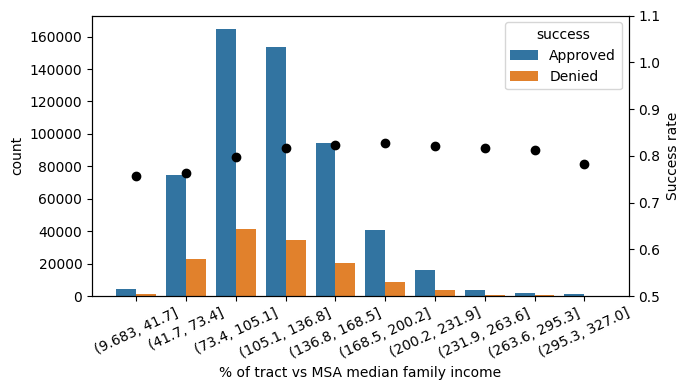

In [95]:
plot_success_numerical(
    df, "tract_to_msa_income_percentage", "% of tract vs MSA median family income", bins=10
)

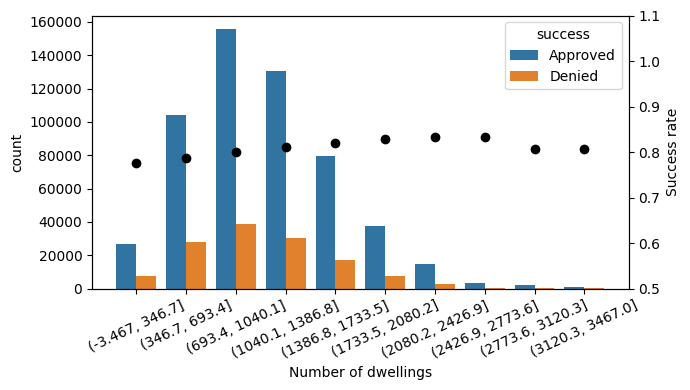

In [96]:
plot_success_numerical(
    df, "tract_owner_occupied_units", "Number of dwellings", bins=10
)

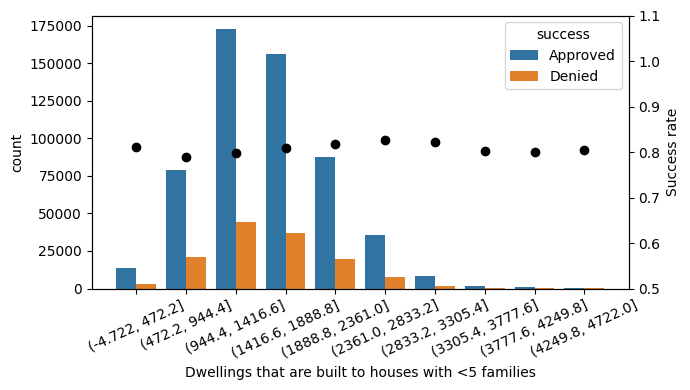

In [97]:
plot_success_numerical(
    df, "tract_one_to_four_family_homes", "Dwellings that are built to houses with <5 families", bins=10
)

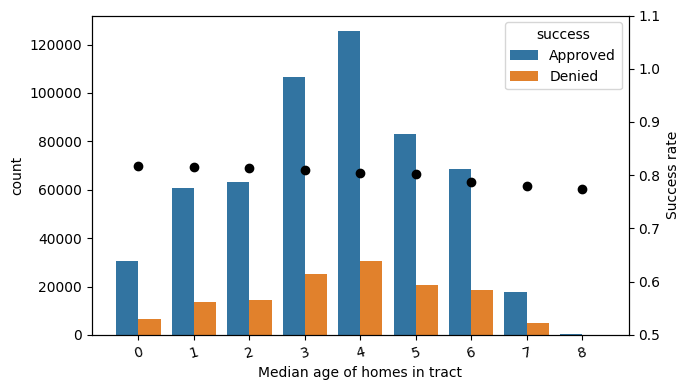

In [106]:
tdf = df[["tract_median_age_of_housing_units", "success"]].copy()
tdf["tract_median_age_of_housing_units"] = [x for x in tdf["tract_median_age_of_housing_units"].values]
plot_success(
    tdf, "tract_median_age_of_housing_units", "Median age of homes in tract",
)